# Face API Sample

face api는 인물 분석을 통해서 다양한 정보를 제공해 줍니다. Azure Portal에서 Face API를 먼저 생성하고 접속에 필요한 URL과 subscription key를 가져와서 보여 줍니다.

관련된 라이브러리를 가져옵니다. request는 웹 통신을 위해서 가져오고 BytesIO, Image는 이미지를 처리하기 위해서 사용하고 있습니다. ImageDraw, ImageFont는 이미지 위에 선을 긋거나 글씨를 넣기 위해서 사용됩니다.

In [1]:
import requests
from io import BytesIO
from PIL import Image, ImageDraw, ImageFont

Subcription Key와 서비스의 주소를 설정합니다.

In [2]:
subscription_key = 'cfed609ad3ef4031bb274bb3e808e302'

In [3]:
faceDetection_url = 'https://facedetect00.cognitiveservices.azure.com/face/v1.0/detect'

분석에 사용할 이미지를 확인합니다.

In [15]:
image_url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT3c1OLAzAOAGz4lgqGHqDrhSe-4Ex-RnNp0g&usqp=CAU'

In [16]:
img = Image.open(BytesIO(requests.get(image_url).content))

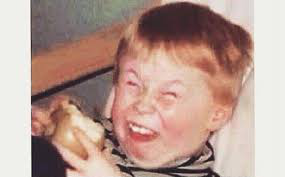

In [17]:
img

In [18]:
headers = {'Ocp-Apim-Subscription-key': subscription_key}
params = {
    'returnFaceID':'true',
    'returnFaceAttributes': 'age, gender, emotion'
}

In [19]:
data = {'url': image_url}

서비스를 호출해서 결과를 확인합니다.

In [20]:
response = requests.post(faceDetection_url,
                        headers=headers,
                        params=params,
                        json=data)

In [21]:
faces = response.json()

In [22]:
faces

[{'faceId': 'c680bcc2-444e-47f6-82c2-1ba145eb9496',
  'faceRectangle': {'top': 64, 'left': 102, 'width': 87, 'height': 87},
  'faceAttributes': {'gender': 'female',
   'age': 8.0,
   'emotion': {'anger': 0.0,
    'contempt': 0.0,
    'disgust': 0.0,
    'fear': 0.0,
    'happiness': 0.997,
    'neutral': 0.0,
    'sadness': 0.0,
    'surprise': 0.003}}}]

In [23]:
draw = ImageDraw.Draw(img)

In [24]:
for face in faces:

    rect = face['faceRectangle']

    left = rect['left']
    top = rect['top']
    width = rect['width']
    height = rect['height']

    draw.rectangle(((left,top),(left+width,top+height)), outline='red')

    face_info = face['faceAttributes']
    emotion = face_info['emotion']
    happiness = emotion['happiness']
    gender = face_info['gender']
    result = 'Gender:' + gender + ' happiness:' + str(happiness * 100)

    draw.text((left, top), result, fill='red')

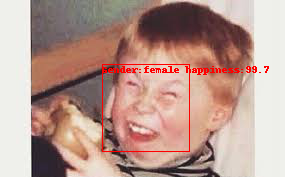

In [25]:
img